In [15]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [16]:
train_data =pd.read_csv('train_data.csv')
test_data =pd.read_csv('test_data.csv')

train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [17]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    
    X = df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
X, y = create_features(df, label='AEP_MW')


In [18]:
#VERİ SETİNİ TRAİN VE TEST İÇİN AYIRIYORUZ %80-%20 ORANINDA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
learning_rate =  0.15
max_depth =  9
n_estimators =  1000
subsample =  0.2
colsample_bytree = 0.5
gamma =0.1    
min_child_weight = 7
max_delta_step = 4 
model = xgb.XGBRegressor(objective='reg:squarederror', 
                        eval_metric='rmse',
                        learning_rate =  learning_rate,
                        n_estimators =  n_estimators,
                        max_depth = max_depth,)


In [30]:
_model = model.fit(X_train, y_train)
model.save_model("XGBoost.json")

In [21]:
test_data = pd.read_csv('test_data.csv')
test_data['Datetime'] = pd.to_datetime(test_data['Datetime'])
test_data.set_index('Datetime', inplace=True)
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
    
X_test, y_test = create_features(test_data, label='AEP_MW')

model = xgb.Booster()
model.load_model('XGBoost.json')

last_date = df.index[-1]


future_dates = [last_date + pd.Timedelta(hours=x) for x in range(1, 169)]
future_df = pd.DataFrame(index=future_dates)
future_X = create_features(future_df)
future_predictions = model.predict(future_X)
future_df['AEP_MW_Predicted'] = future_predictions

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [ ]:
# Tahminleri görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(test_data.index[-168*2:-168*1], test_data['AEP_MW'][-168*2:-168*1], label='Actual Result')
plt.plot(test_data.index[-168*2:-168*1], future_df['AEP_MW_Predicted'], label='Predicted Result')

step = 24
x_ticks = test_data[-168*2:-168*1].index[::step]
plt.xticks(ticks=x_ticks, labels=x_ticks) 

plt.xlabel('Zaman')
plt.ylabel('MWH')
plt.title('SHORT TERM ENERGY CONSUMPTION FORECASTİNG')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.plot

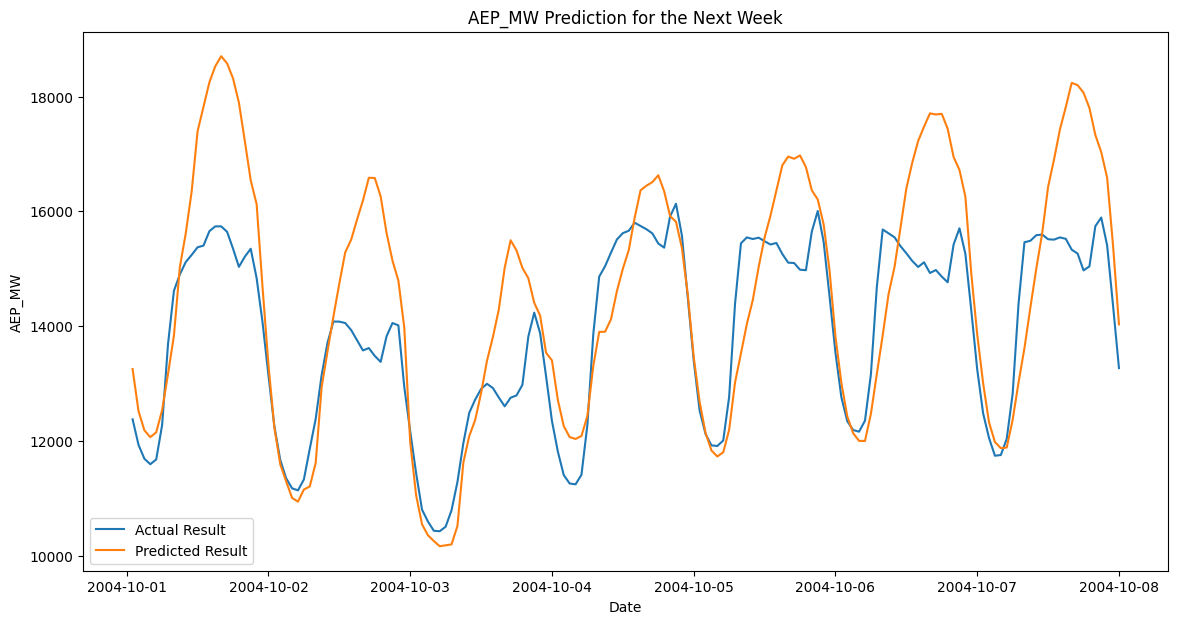

In [33]:
# Tahminleri görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(df.index[:168], df['AEP_MW'][:168], label='Actual Result')
plt.plot(df.index[:168], future_df['AEP_MW_Predicted'], label='Predicted Result')
plt.legend()
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.title('AEP_MW Prediction for the Next Week')
plt.show()